In [1]:
12

12

In [ ]:
# 머신러닝 구조(패턴)
# 데이터 수집 -> 정제/EDA -> 전처리 -> 데이터 분리 -> 모델 선정 -> 학습 -> 평가 -> 피드백 후 재학습 or모델변경 or 데이터 변경(전처리)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# 1. 데이터 수집 및 데이터 전처리(모델에 학습할 데이터 준비)
# 기본 데이터를 학습 데이터와 테스트데이터로 8:2 준비
# 학습 데이터 X_train(feature), y_train(label) / 테스트 데이터 X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(
    iris_data, iris_label, 
    train_size=0.8, # 80% 학습 데이터 사용
    shuffle=False,  # 무작위 섞음 옵션
    stratify=iris_data.label, # 라벨데이터로 비율을 맞추겠다
    random_state=11 # np.random.seed()랑 동일 # 테스트시 재현성 확보를 위해 교정결과로 지정5기
    )

# 2. 모델 준비
model = LinearRegression()

# 3. 학습 (준비해놓은 학습데이터 사용)
model.fit(X_train, y_train) 

# 4. 예측 (준비해놓은 테스트데이터 사용)
y_pred = model.predict(X_test)

# 5. 평가
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print(mse)
print(r2)

# 6. 시각화 
# #  결과 및 시각화



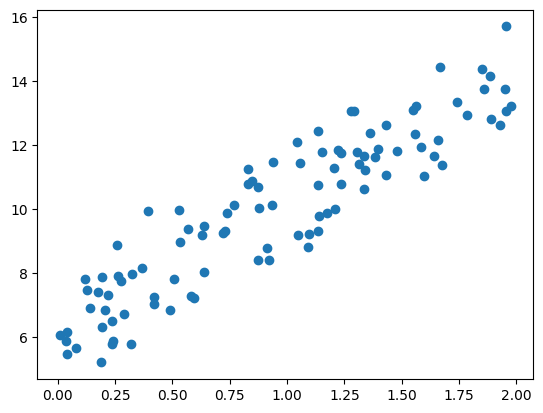

In [3]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1) # 0~2까지의 랜덤값 100개
y = 6 + 4 * X + np.random.randn(100, 1) # y= 6+4x+잡음(Random Noise) 형태로 생성

# 데이터 시각화
plt.scatter(X, y)
plt.show()


6.2221510774471165


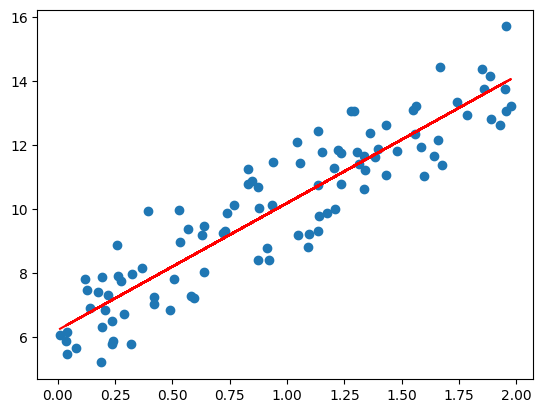

In [ ]:

# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)  # 샘플수
    cost = np.sum(np.square(y - y_pred)) / N    # 평균 제곱 오차
    return cost

# 가중치(w1, w0) 업데이트 함수 정의
def get_weight_update(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    y_pred = np.dot(X, w1.T) + w0   # 예측값 계산
    diff = y - y_pred               # 오차 계산 

    w0_factors = np.ones((N, 1))    # w0 업데이트하는 상수 1배열

    w1_update = -(2 / N) * learning_rate * (np.dot(X.T, diff))  # w1 값 업데이트 
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff)) # w0 업데이트 값 저장

    return w1_update, w0_update

# 경사 하강법 함수 정의
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1, 1))   # 초기 w0값 설정
    w1 = np.zeros((1, 1))   # 초기 w1값 설정

    # 가중치 업데이트 값 계산
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update # w1 업데이트 적용
        w0 = w0 - w0_update # w0 업데이트 적용

    return w1, w0

# 경사 하강법 실행 및 결과 확인
w1, w0 = gradient_descent_steps(X, y, iters=10000)
print(w0[0, 0])  # w0 결과 출력

# 예측값 계산
y_pred = w1[0, 0] * X + w0

# 예측 결과 시각화
plt.scatter(X, y)   # 원본 데이터
plt.plot(X, y_pred, color='r') # 경사하강법으로 학습된 직선
plt.show()

In [5]:
123

123

1. 데이터 만들고
2. 선형 모델 만들기
3. 손실 계산
4. 기울기 구하기
5. 파라미터 업데이트
6. 수렴할 때까지 반복

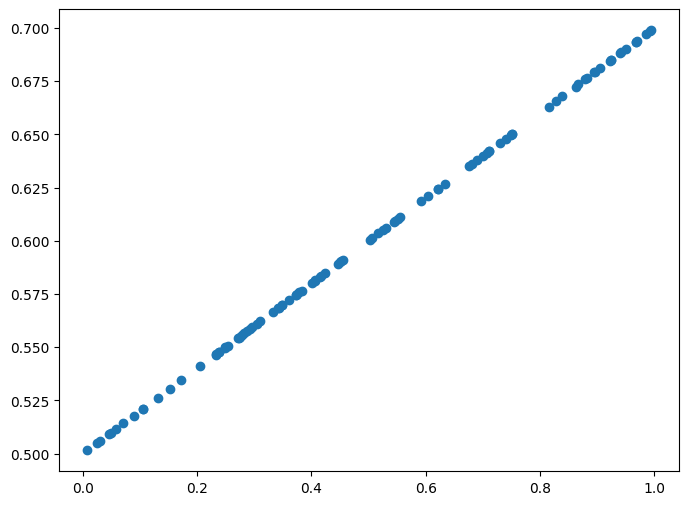

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.random.rand(100) # 0~1사이에 데이터 100개
Y = 0.2 * X + 0.5       # 정답 Y (기울기 0.2, 절편 0.5인 직선)

# 시각화
plt.figure(figsize=(8,6))
plt.scatter(X,Y) # 산정도 플롯

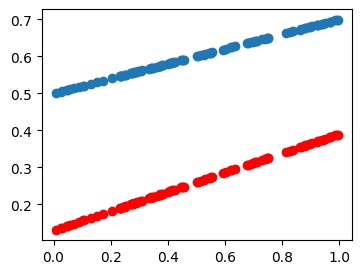

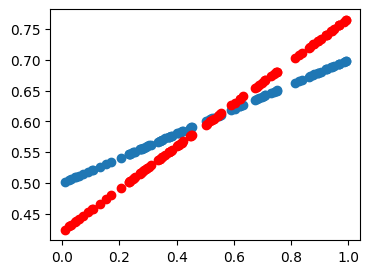

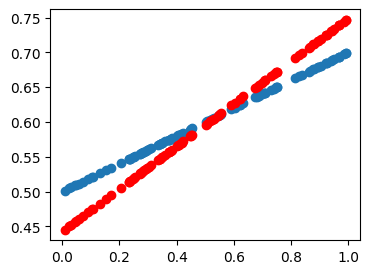

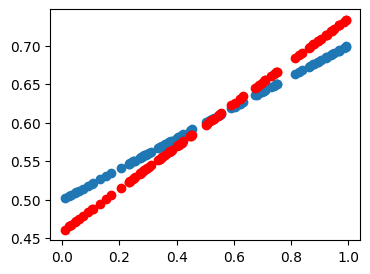

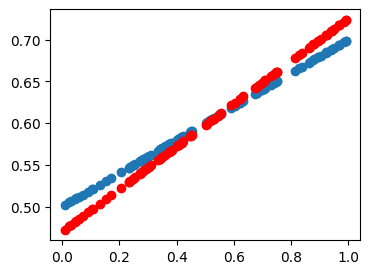

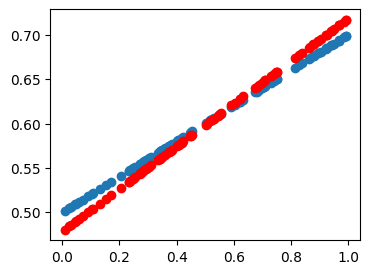

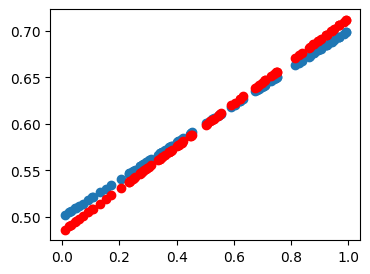

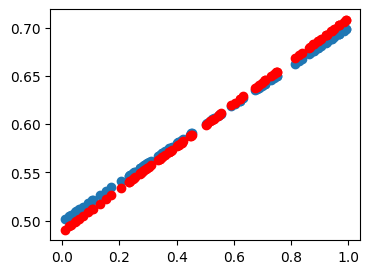

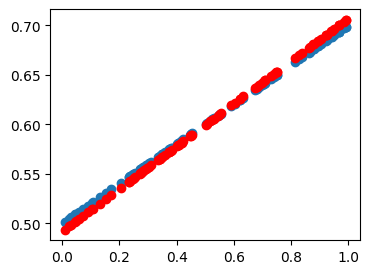

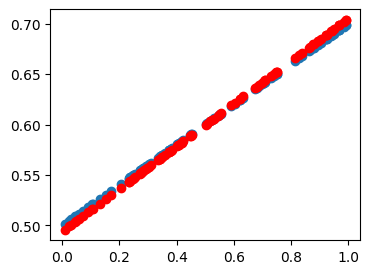

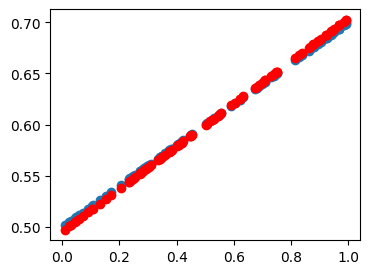

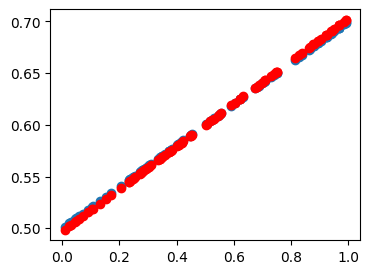

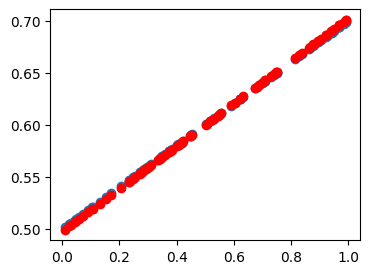

W 0.20376215372297407
b 0.4979650639597424


In [71]:
W = np.random.uniform(-1,1) # 가중치 w를 -1~1 사이 랜덤값으로 초기화
b = np.random.uniform(-1,1) # 가중치 b를 -1~1 사이 랜덤값으로 초기화

def plot_read(pred,y):
    plt.figure(figsize = (4,3))
    plt.scatter(X,y)                # 실제 데이터
    plt.scatter(X,pred,color='r')   # 예측 값(빨간 점)
    plt.show()

# 경사하강법을 통한 학습
lr = 0.5

# 경사하강법 사용해서 가중치와 편향을 업데이트하며 학습 진행
for epoch in range(300):
    y_pred =W * X+b     # 현재 W,b로 예측값 계산 
    
    error = np.abs(y_pred -Y).mean() # 예측값과 실제값의 평균 절대 오차(MAE)
    
    w_grad = lr * ((y_pred - Y)*X).mean() # W에 대한 기울기 계산 후 학습률 곱하기 
    b_grad = lr * (y_pred - Y).mean() # b에 대한 기울기 계산 후 학습률 곱하기 

    W = W - w_grad # 가중치 W를 경사하강법으로 업데이트
    b = b - b_grad # b에 대한 경사하강법으로 업데이트
    
    # 오차가 충분히 작아지면 반복 중단 (조기중단) -> 스케쥴러
    if error <0.001:    
        break

    if epoch % 10 == 0:     # 10번 애폭마다
        y_pred = W* X+b     # 최신 w와 b로 다시 예측
        plot_read(y_pred,Y) # 예측 결과를 시각화

# 최종 학습된 가중치와 편향 확인 
print('W',W)    # 학습된 기울기 w
print('b',b)    # 학습된 편향 b


In [79]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


기울기 (coefficient) : 2.0
절편 (intercept) : -0.20000000000000018
MSE: 0.15999999999999992
R2 Score: 0.9803921568627451


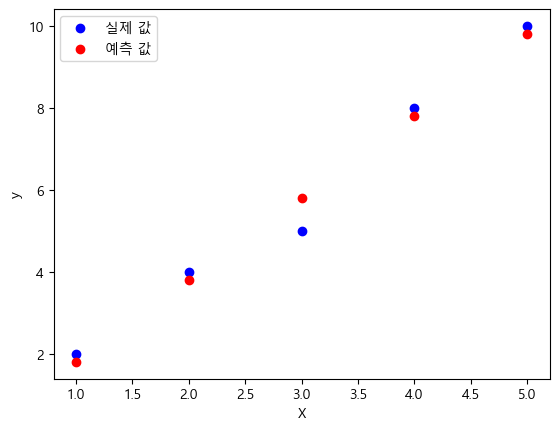

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #선형 회귀 모델
from sklearn.metrics import mean_squared_error,r2_score # 평가지표 

# 데이터 생성
X = np.array([[1],[2],[3],[4],[5]]) # 입력값(2차원 형태)
y = np.array([2,4,5,8,10])          # 실제 출력값

# print(X.shape)
# print(y.shape)

model = LinearRegression()
model.fit(X,y)

# 예측 값
y_pred = model.predict(X)
y_pred

# 평가 지표 계산
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

print(f"기울기 (coefficient) : {model.coef_[0]}") # 학습된 기울기 W 출력
print(f"절편 (intercept) : {model.intercept_}") # 학습된 절편 b 출력
print(f"MSE: {mse}")    # MSE 평균 제곱 오차
print(f"R2 Score: {r2}") # R2 스코어

# 결과 시각화
plt.scatter(X,y, color='b',label = '실제 값')
plt.scatter(X,y_pred, color='r',label = '예측 값')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()



In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀  모델
from sklearn.metrics import mean_squared_error # MSE(평균 제곱 오차) 평가 지표

# 데이터 생성
X = np.array([[1, 2100], [2, 2500], [3, 1800], [4, 2200], [5, 1700]])
y = np.array([500, 550, 480, 530, 475])

# model생성
model = LinearRegression()
model.fit(X,y)

# 예측값 계산
y_pred = model.predict(X)

print(y)
print()
print(y_pred)

# 평가 지표 계산
mse = mean_squared_error(y,y_pred)

print(f"기울기 (coefficient) : {model.coef_}") # 학습된 기울기 W 출력
print(f"절편 (intercept) : {model.intercept_}") # 학습된 절편 b 출력
print(f"MSE: {mse}")    # MSE 평균 제곱 오차


[500 550 480 530 475]

[500.77319588 551.08247423 477.78350515 528.09278351 477.26804124]
기울기 (coefficient) : [5.36082474 0.11237113]
절편 (intercept) : 259.4329896907218
MSE: 3.0927835051547214
R2 Score: 0.9803921568627451


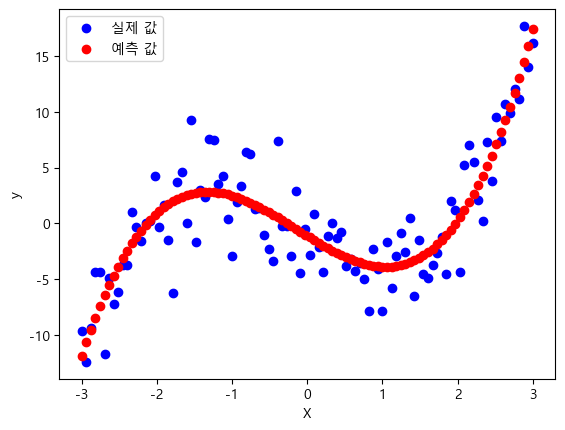

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
# X =np.linspace(-3,3,100)
X =np.linspace(-3,3,100).reshape(-1,1) # -3~3 사이의 값을 100개 생성 후 2차원 배열로 변환
# X.shape
y = X**3 - 4*X + np.random.randn(100,1)*3 # 비선형 함수 + 노이즈 y 생성

# 다항 특성 변환 (차수 3)
poly_features  = PolynomialFeatures(degree=3,include_bias=False) # DEGREE3 =>X,X^2,X^3 방식으로 생성
X_poly = poly_features.fit_transform(X) # X를 다항 특성으로 변환

# 선형회귀 모델 학습
model = LinearRegression()
model.fit(X_poly,y)

# 예측값 계산
y_pred = model.predict(X_poly)

# 결과 시각화
plt.scatter(X,y, color='b',label = '실제 값')
plt.scatter(X,y_pred, color='r',label = '예측 값')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


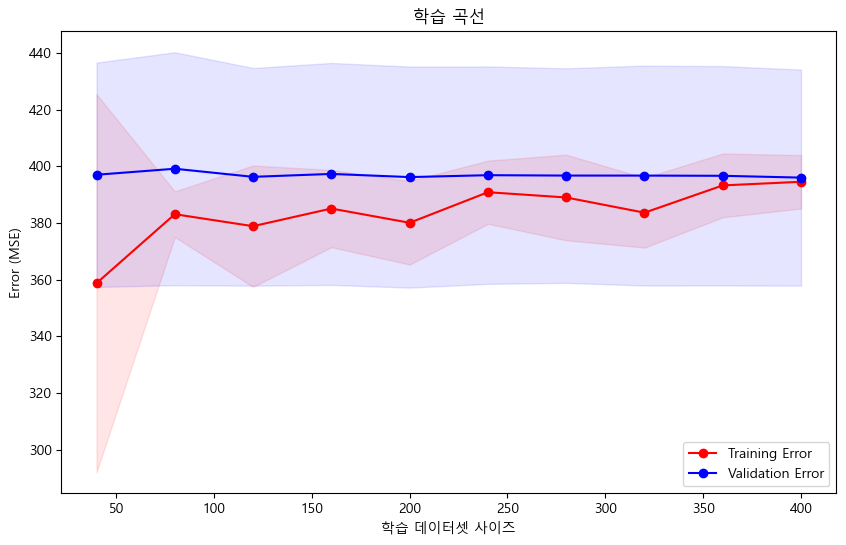

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve # 학습 곡선 계산 함수
from sklearn.linear_model import LinearRegression # 선형회귀모델
from sklearn.datasets import make_regression # 회귀용 예제 데이터셋

# 데이터 생성 (샘플 500개, 특징 1개, 노이즈 포함)
X,y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(),                 # 선형 회귀 모뎅
    X,y,                                # 입력(X),타겟(y)
    cv=5,                               # 교차검증 5-fold
    scoring='neg_mean_squared_error',       # MSE 사용
    train_sizes=np.linspace(0.1,1.0,10) # 0.1 ~ 1.0까지 10단계로 점자적으로 증가
)

# 평균과 표준편차 계산
train_mean = -train_scores.mean(axis=1) # train scores 평균(MSE). 음수를 양수로 변경
train_std = train_scores.std(axis=1)    # train scores 표준편차
val_mean = -val_scores.mean(axis=1)     # validation scores 평균(MSE) 음수를 양수로 변경
val_std = val_scores.std(axis=1)        # validation scores 표준편차

# 학습곡선 시각화
plt.figure(figsize=(10,6))
plt.plot(train_sizes,train_mean, 'o-',label='Training Error', color='r')
plt.plot(train_sizes,val_mean, 'o-',label='Validation Error', color='b')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color ='red')  # 훈련 에러 신뢰구간
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="blue")          # 검증 에러 신뢰구간
plt.xlabel("학습 데이터셋 사이즈")
plt.ylabel("Error (MSE)")
plt.title("학습 곡선")
plt.legend()
plt.show()

In [ ]:
import math

p = [1, 2]
q = [4, 6]

distance = math.dist(p, q)
print(distance)   # 출력: 5.0

5.0


In [74]:
# 맨해튼 거리
p = [1, 2]
q = [4, 6]

manhattan = sum(abs(pi - qi) for pi, qi in zip(p, q))
print(manhattan)   # 출력: 7

7


In [75]:
import numpy as np

p = np.array([1, 2])
q = np.array([2, 3])

cos_sim = np.dot(p, q) / (np.linalg.norm(p) * np.linalg.norm(q))
print(round(cos_sim, 3))   # 출력: 0.983

0.992


In [81]:
import numpy as np
from scipy.spatial.distance import mahalanobis

# 샘플 데이터(공분산 계산용)
data = np.array([
    [1, 2],
    [2, 2],
    [3, 4]
])

p = np.array([1, 2])
q = np.array([3, 4])

cov = np.cov(data.T)               # 공분산 행렬
inv_cov = np.linalg.inv(cov)       # 공분산 역행렬

dist = mahalanobis(p, q, inv_cov)
print(round(dist, 3))  # 예: 2.0

2.0


In [83]:
# 시그모이드 함수
import numpy as np

theta = np.array([0.5, 1.0])   # 가중치
x = np.array([1, 2])           # 입력 데이터

z = theta @ x                  # 선형 조합 (θ^T x)
sigmoid = 1 / (1 + np.exp(-z)) # 시그모이드 함수

print(round(sigmoid, 3))  # 예: 0.953

0.924


In [ ]:
import numpy as np

# 간단한 데이터 (x: 특성, y: 레이블)
x = np.array([0.2, 0.8, 1.5])
y = np.array([0, 1, 1])

theta = 1.0                            # 임의 가중치
z = theta * x                          # 선형 결합 z = theta * x
h = 1 / (1 + np.exp(-z))               # 시그모이드 -> 예측 확률 h(x)

# Log Loss 계산
log_loss = -np.mean(y*np.log(h) + (1-y)*np.log(1-h)) # 로지스틱 회귀의 비용함수
print(round(log_loss, 3))              # 예: 0.391(계산된 손실값)

# 예측 (threshold=0.5)
pred = (h >= 0.5).astype(int)           # 0.5 이상이면 1, 이하면 0
print(pred)                             # 예: [0 1 1]

0.457
[1 1 1]


In [ ]:
import numpy as np

# 클래스 3개에 대한 점수(θᵀx 값)
scores = np.array([2.0, 1.0, 0.1]) # 각 클래스의 점수

# 소프트맥스 함수
exp_scores = np.exp(scores) # scores를 지수 변환
softmax = exp_scores / np.sum(exp_scores)   # 

print(np.round(softmax, 3))   # 예: [0.659 0.242 0.099]

[0.659 0.242 0.099]


In [86]:
import numpy as np

# 입력 벡터
x = np.array([1.2, 0.5])

# 각 레이블별 가중치 (3개의 레이블: 액션, 코미디, 드라마)
theta = np.array([
    [1.0, -0.5],   # 액션
    [-0.3, 1.2],   # 코미디
    [0.8, 0.8]     # 드라마
])

# 레이블별 선형 조합 + 시그모이드
z = theta @ x
sigmoid = 1 / (1 + np.exp(-z))

print(np.round(sigmoid, 3))   # 예: [0.777 0.622 0.845]

[0.721 0.56  0.796]


In [87]:
import numpy as np

x = np.array([1.0, 0.5])   # 입력 특징

# 출력 1: 질병 유무 (이진 분류 → 시그모이드)
theta_disease = np.array([1.2, -0.8])
z1 = theta_disease @ x
disease_prob = 1 / (1 + np.exp(-z1))

# 출력 2: 중증도 (4개 클래스 → 소프트맥스)
theta_severity = np.array([
    [0.5, 1.0],
    [1.0, -0.2],
    [-0.5, 0.7],
    [0.2, 0.1]
])
z2 = theta_severity @ x
exp_scores = np.exp(z2)
severity_prob = exp_scores / np.sum(exp_scores)

print("질병 확률:", round(disease_prob, 3))
print("중증도 확률:", np.round(severity_prob, 3)) 

질병 확률: 0.69
중증도 확률: [0.371 0.336 0.118 0.175]


In [88]:
import numpy as np

y_true = np.array([1, 0, 1, 1, 0])   # 실제값
y_pred = np.array([1, 0, 0, 1, 0])   # 예측값

TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

accuracy = (TP + TN) / len(y_true)
print("Accuracy:", round(accuracy, 3))   # 예: 0.8

Accuracy: 0.8


In [ ]:
import numpy as np

y_true = np.array([1, 0, 1, 1, 0])  # 정답값
y_pred = np.array([1, 1, 0, 1, 0])  # 모델 예측값

# Confusion Matrix 요소 계산
TP = np.sum((y_true == 1) & (y_pred == 1))  # 2
TN = np.sum((y_true == 0) & (y_pred == 0))  # 1
FP = np.sum((y_true == 0) & (y_pred == 1))  # 1
FN = np.sum((y_true == 1) & (y_pred == 0))  # 1

print(f"TP={TP}, FP={FP}, FN={FN}, TN={TN}")

TP=2, FP=1, FN=1, TN=1
